## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-015-15-Features-Minerals

## My Mars minerals goes wrong

In [1]:

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=10000,
                           n_features=14,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

In [4]:
Xdf=pd.DataFrame(X)

In [5]:
Xdf.columns = ['silicon', 
'hydrogen', 
'oxygen', 
'iron', 
'magnesium', 
'manganese', 
'aluminum', 
'calcium', 
'gold', 
'silver', 
'nickel', 
'titanium', 
'platinum',
'copper']

In [6]:
print(Xdf.columns)
c=Xdf.columns

Index([u'silicon', u'hydrogen', u'oxygen', u'iron', u'magnesium', u'manganese',
       u'aluminum', u'calcium', u'gold', u'silver', u'nickel', u'titanium',
       u'platinum', u'copper'],
      dtype='object')


In [7]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%-4d. %-10s (%-4d) (%f)" % (f + 1, c[f], indices[f], importances[indices[f]]))

Feature ranking:
1   . silicon    (1   ) (0.274371)
2   . hydrogen   (0   ) (0.218598)
3   . oxygen     (2   ) (0.196282)
4   . iron       (4   ) (0.028573)
5   . magnesium  (6   ) (0.028527)
6   . manganese  (5   ) (0.028477)
7   . aluminum   (13  ) (0.028319)
8   . calcium    (11  ) (0.028308)
9   . gold       (10  ) (0.028301)
10  . silver     (3   ) (0.028293)
11  . nickel     (12  ) (0.028277)
12  . titanium   (8   ) (0.028115)
13  . platinum   (7   ) (0.027817)
14  . copper     (9   ) (0.027744)


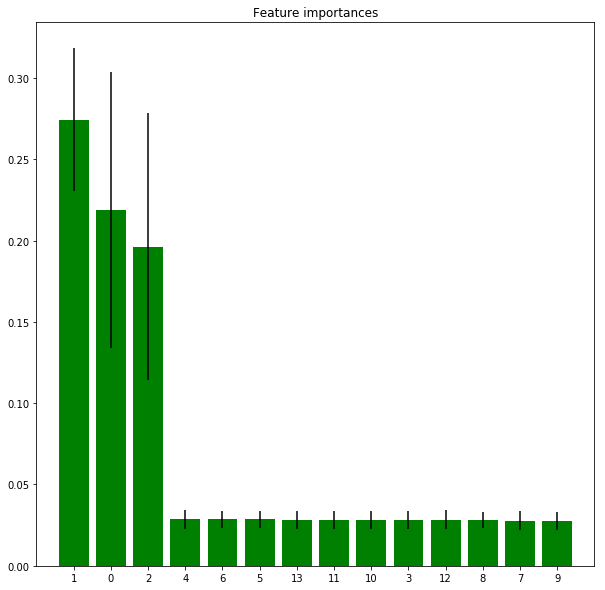

In [8]:
# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="green", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Done

In [9]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

('Done!', '2019-05-04 23:59:25.921000')
